## The Triple Well Potential

In [1]:
from transit_chem import oneD

from matplotlib import pyplot as plt
import numpy as np

In [2]:
triple_well = oneD.TripleWellPotential.from_params(
    well1_depth=1.0,
    well1_halfwidth=2.0,
    bridge_length=5.0,
    bridge_depth=0.5,
    well3_halfwidth=2.5,
    well3_depth=2,
)
triple_well

TripleWellPotential(center1=(0, 0), barrier12=(2.0, 1.0), center2=(4.5, 0.5), barrier23=(7.0, 1.0), center3=(9.5, -1.0))

(-1, 5)

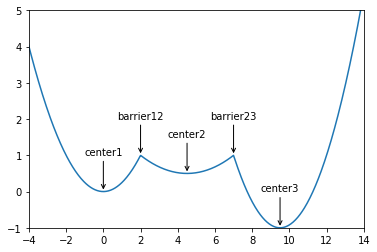

In [3]:
x = np.linspace(-10, 20, 1000)
y = triple_well(x)


# Plot everything
fig = plt.figure()
ax = fig.gca()
ax.plot(x, y)

# Label the points of interest
attrs = ["center1", "center2", "center3", "barrier12", "barrier23"]
for i, attr in enumerate(attrs):
    point = getattr(triple_well, attr)
    ax.annotate(attr, point, xytext=(point[0], point[1] + 1), arrowprops=dict(arrowstyle="->"), horizontalalignment="center")
plt.xlim(-4, 14)
plt.ylim(-1, 5)

In [4]:
triple_well.well1

Parabola(a=0.25, b=-0.0, c=0.0)

In [5]:
from transit_chem.basis import HarmonicOscillator

ho = HarmonicOscillator.from_parabola(triple_well.well1, n=0)
ho

HarmonicOscillator(n=0, center=0.0, mass=1.0, omega=0.7071067811865476)

(-1, 5)

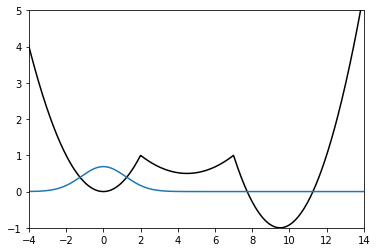

In [6]:
plt.plot(x, triple_well(x), color="k")
plt.plot(x, ho(x))
plt.xlim(-4, 14)
plt.ylim(-1, 5)

In [7]:
from transit_chem.basis import harmonic_basis_from_parabola

(-1, 5)

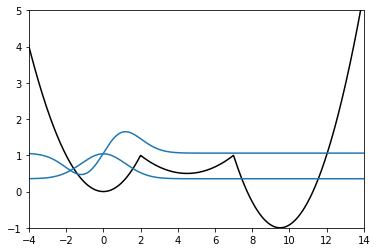

In [8]:
well1_basis = harmonic_basis_from_parabola(triple_well.well1, cutoff_energy=1.5)
well1_basis

plt.plot(x, triple_well(x), color="k")
for basis_func in well1_basis:
    plt.plot(x, basis_func(x) + basis_func.energy, color="C0")
plt.xlim(-4, 14)
plt.ylim(-1, 5)

(-1, 5)

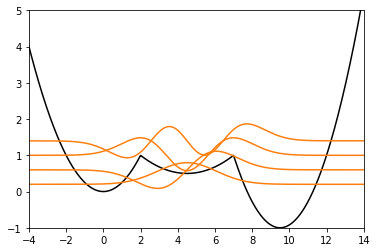

In [9]:
well2_basis = harmonic_basis_from_parabola(triple_well.well2, cutoff_energy=1.5)


plt.plot(x, triple_well(x), color="k")
for basis_func in well2_basis:
    plt.plot(x, basis_func(x) + basis_func.energy, color="C1")
plt.xlim(-4, 14)
plt.ylim(-1, 5)

(-1, 5)

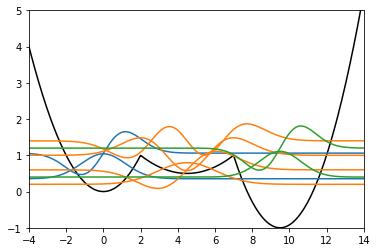

In [10]:
well3_basis = harmonic_basis_from_parabola(triple_well.well3, cutoff_energy=1.5)


plt.plot(x, triple_well(x), color="k")

for basis_func in well1_basis:
    plt.plot(x, basis_func(x) + basis_func.energy, color="C0")
    
for basis_func in well2_basis:
    plt.plot(x, basis_func(x) + basis_func.energy, color="C1")
    
for basis_func in well3_basis:
    plt.plot(x, basis_func(x) + basis_func.energy, color="C2")
    
plt.xlim(-4, 14)
plt.ylim(-1, 5)